<b> About Data Set:


This dataset is useful for analyzing bike rental patterns based on various factors such as weather, time of day, and day of the
week. It can be used to understand trends and make predictions related to bike rentals.

<b> Problem Stement:

The task is to develop a predictive model to forecast bike rentals based on various factors such as weather conditions, time of 
day, and day of the week. Using historical data on bike rentals, the objective is to build a machine learning model that
accurately predicts the total count of bike users (casual + registered) for future time periods

<b> Column Description

1.instant: An identifier for each record.

2.dteday: Date of the recorded data.

3.season: Season of the year (1 = spring, 2 = summer, 3 = fall, 4 = winter).

4.yr: Year (0 = 2011, 1 = 2012).

5.mnth: Month of the year (1 to 12).

6.hr: Hour of the day (0 to 23).

7.holiday: Indicates if it's a holiday (1 = holiday, 0 = non-holiday).

8.weekday: Day of the week (0 to 6).

9.workingday: Indicates if it's a working day (1 = working day, 0 = weekend or holiday).

10.weathersit: Weather situation (1 = clear, 2 = mist/cloudy, 3 = light rain/snow, 4 = heavy rain/snow).

11.temp: Normalized temperature in Celsius.

12.atemp: Normalized feeling temperature in Celsius.

13.hum: Normalized humidity.

14.windspeed: Normalized wind speed.

15.casual: Count of casual bike users.

16.registered: Count of registered bike users.

17.cnt: Total count of bike users (sum of casual and registered users).

In [ ]:
# get access your google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/MyDrive/Imarticus/Stats

/gdrive/MyDrive/Imarticus/Stats


In [ ]:
#  imports essential libraries for data manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn), and configures Matplotlib for inline plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
 # Load your InsuranceLosses  dataset
data=pd.read_csv("/gdrive/MyDrive/Imarticus/Stats/hour1.csv")

In [ ]:
# Let us make another copy of data
df=data.copy()

In [ ]:
 # Display first five rows of dataframe
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,Total count of bike users
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
 # Display Last five rows of dataframe
df.tail()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,Total count of bike users
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [ ]:
# Display size of dataframe
df.size

295443

In [ ]:

# Checking the column names
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered',
       'Total count of bike users'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   instant                    17379 non-null  int64  
 1   dteday                     17379 non-null  object 
 2   season                     17379 non-null  int64  
 3   year                       17379 non-null  int64  
 4   month                      17379 non-null  int64  
 5   hour                       17379 non-null  int64  
 6   holiday                    17379 non-null  int64  
 7   weekday                    17379 non-null  int64  
 8   workingday                 17379 non-null  int64  
 9   weathersit                 17379 non-null  int64  
 10  temperature                17379 non-null  float64
 11  atemp                      17379 non-null  float64
 12  humidity                   17379 non-null  float64
 13  windspeed                  17379 non-null  flo

Observations :

There are 17379 rows and 17 columns. There are 1 independent object variable, 12 numerical independent variable and dependent variable is of int64 type.

In [ ]:
# Column name has some spaces fix them
df.columns = [col.replace(' ','_') for col in df.columns]

In [ ]:
df.isna().sum()

instant                      0
dteday                       0
season                       0
year                         0
month                        0
hour                         0
holiday                      0
weekday                      0
workingday                   0
weathersit                   0
temperature                  0
atemp                        0
humidity                     0
windspeed                    0
casual                       0
registered                   0
Total_count_of_bike_users    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temperature,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
dteday,17379,731,01-01-2011,24


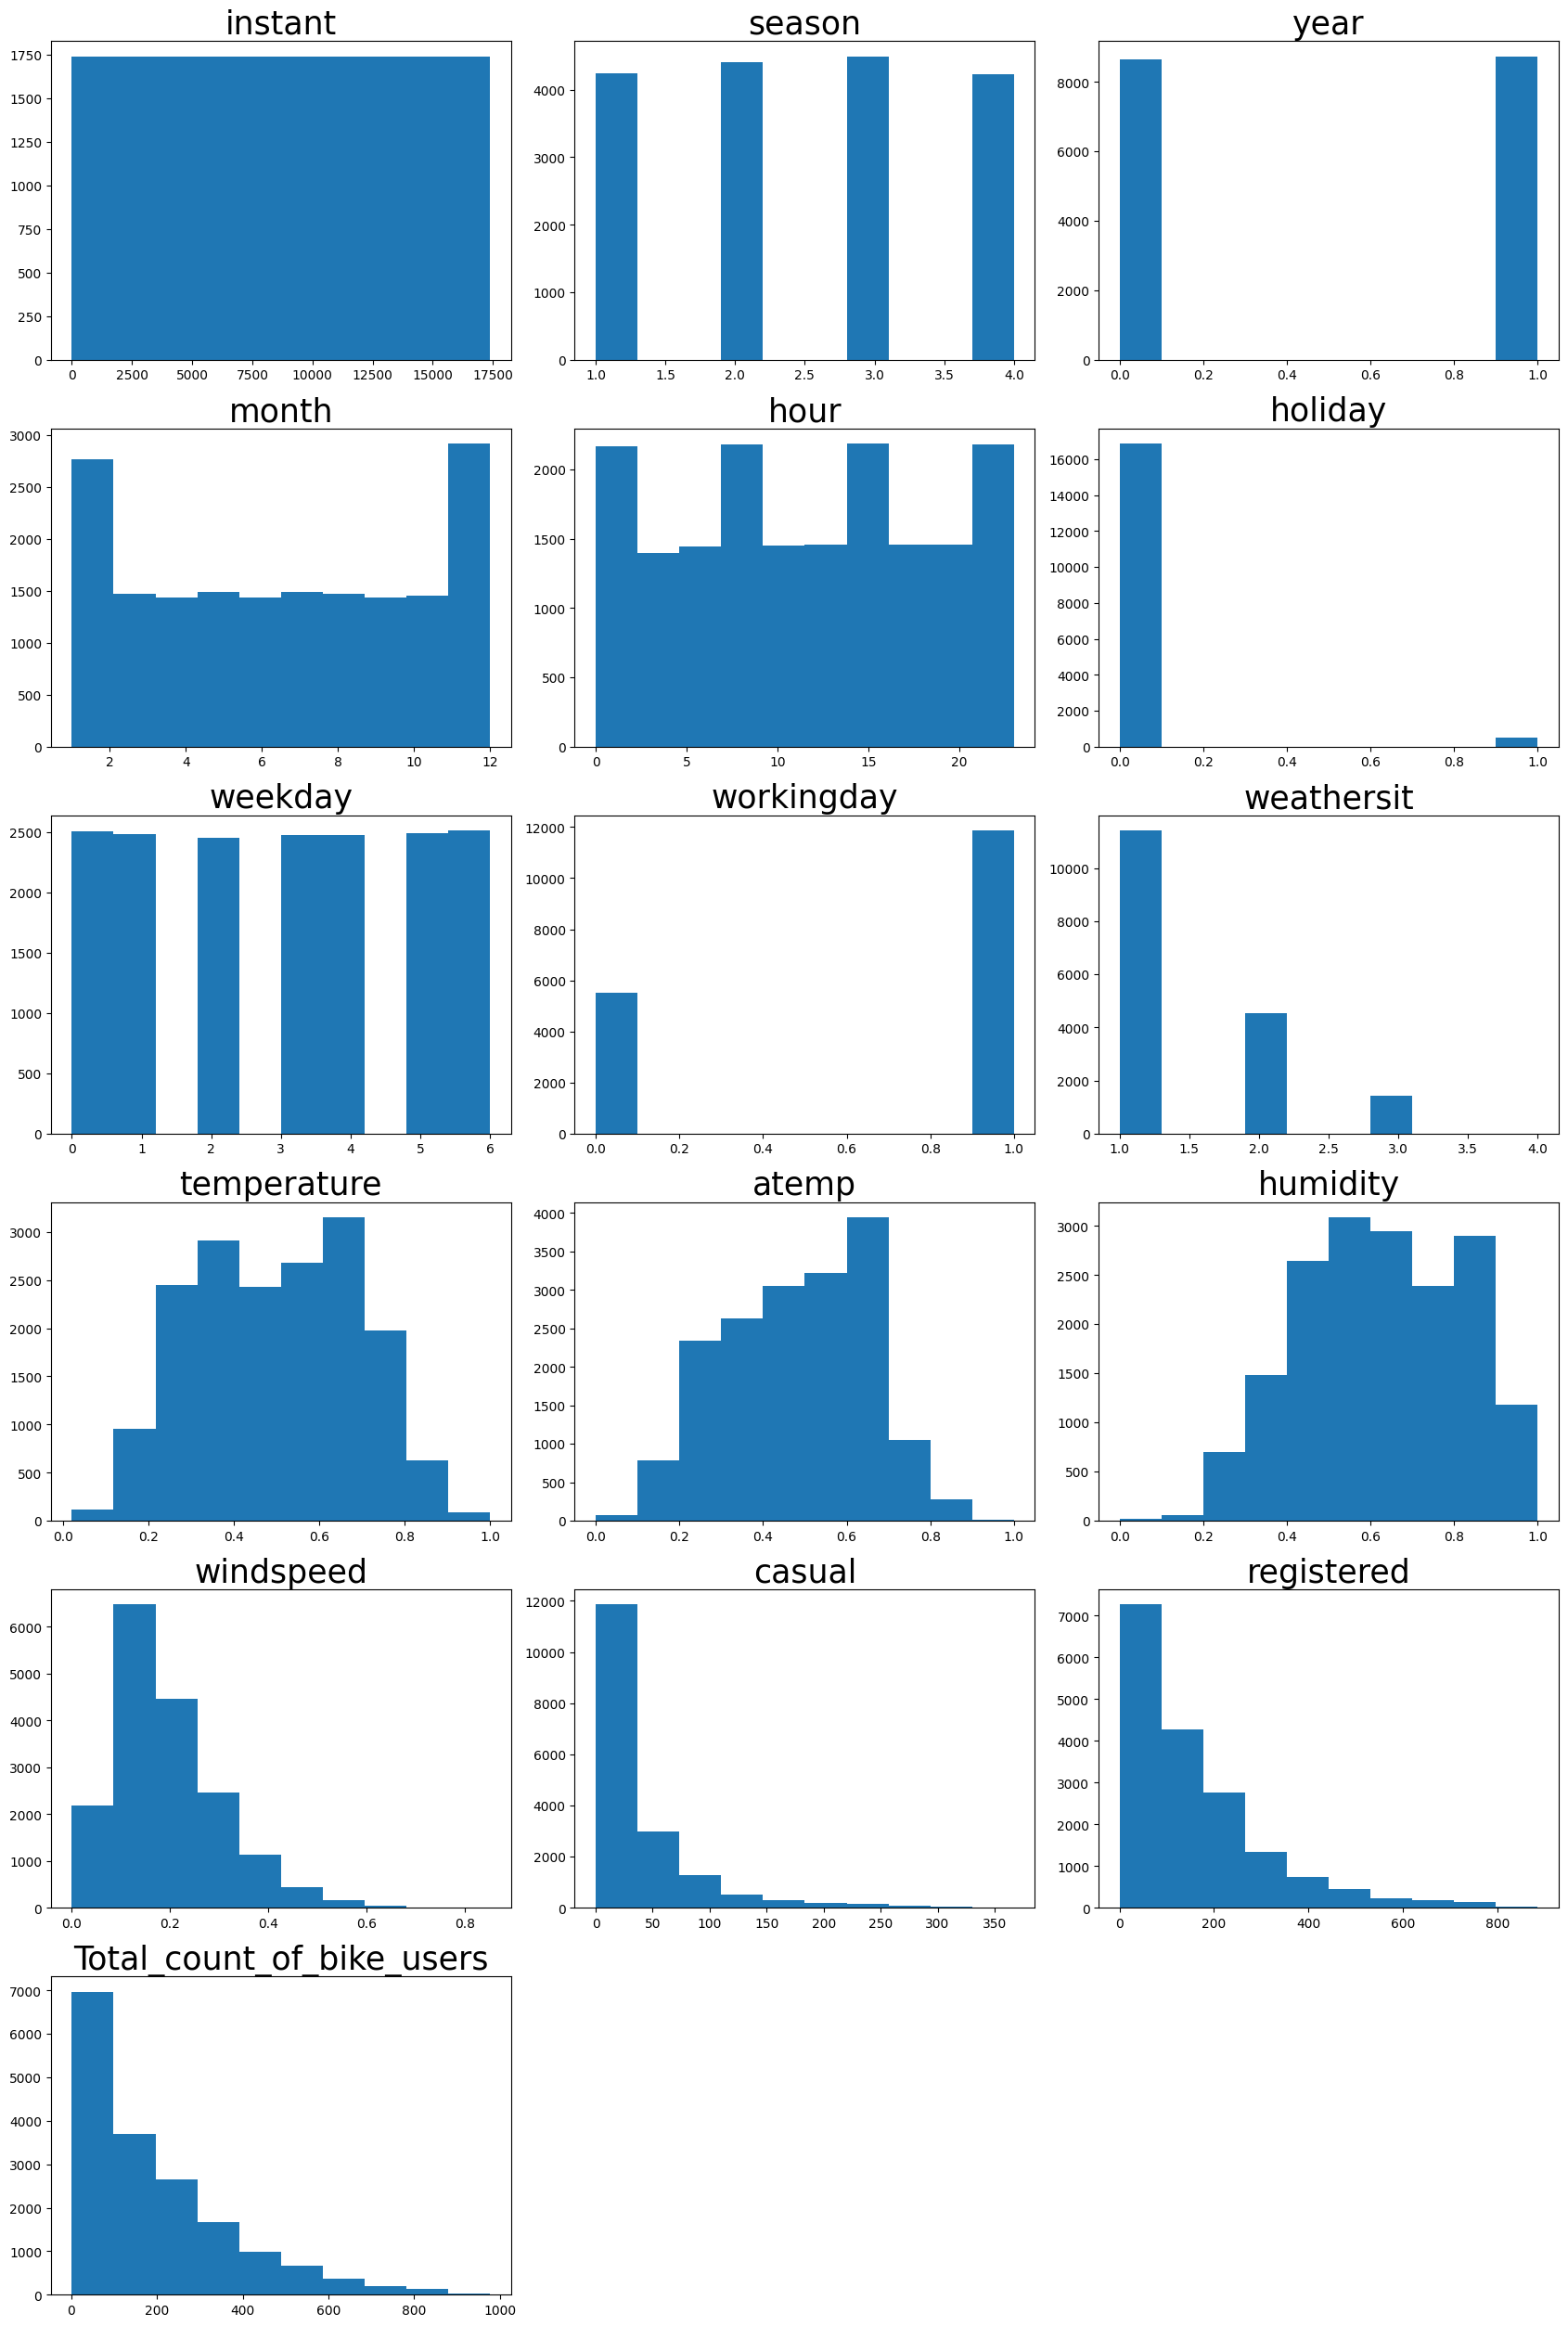

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

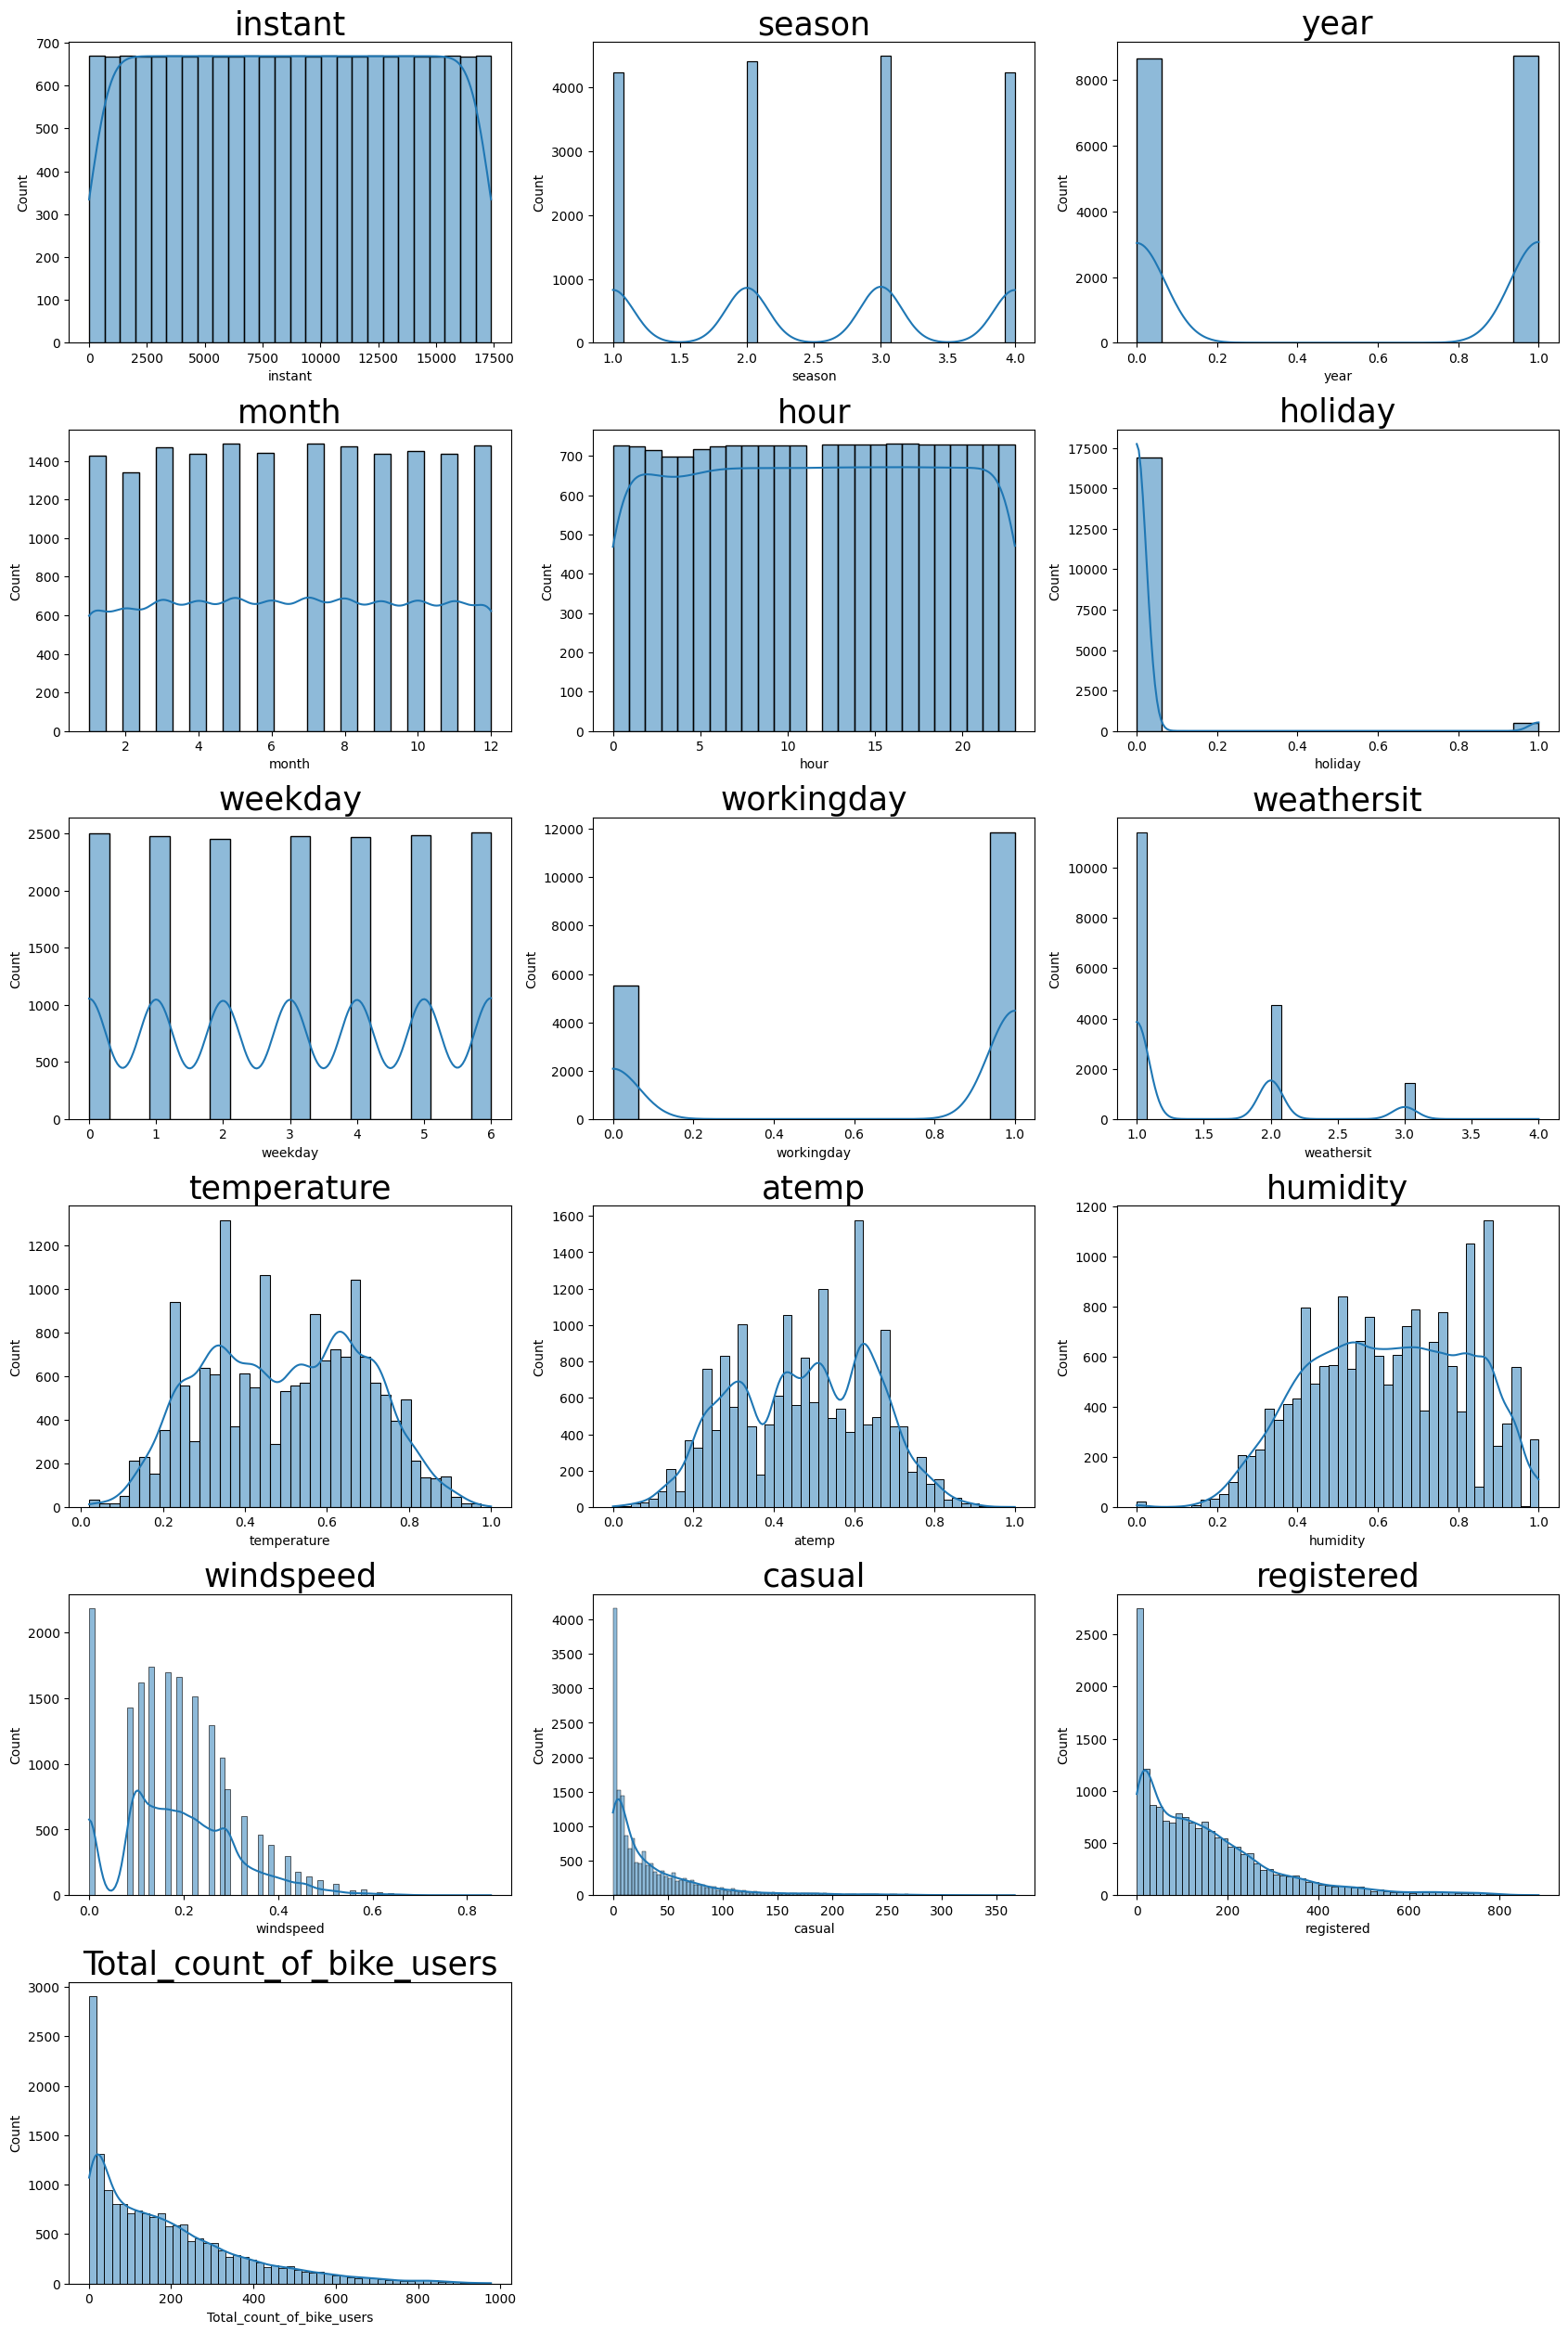

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

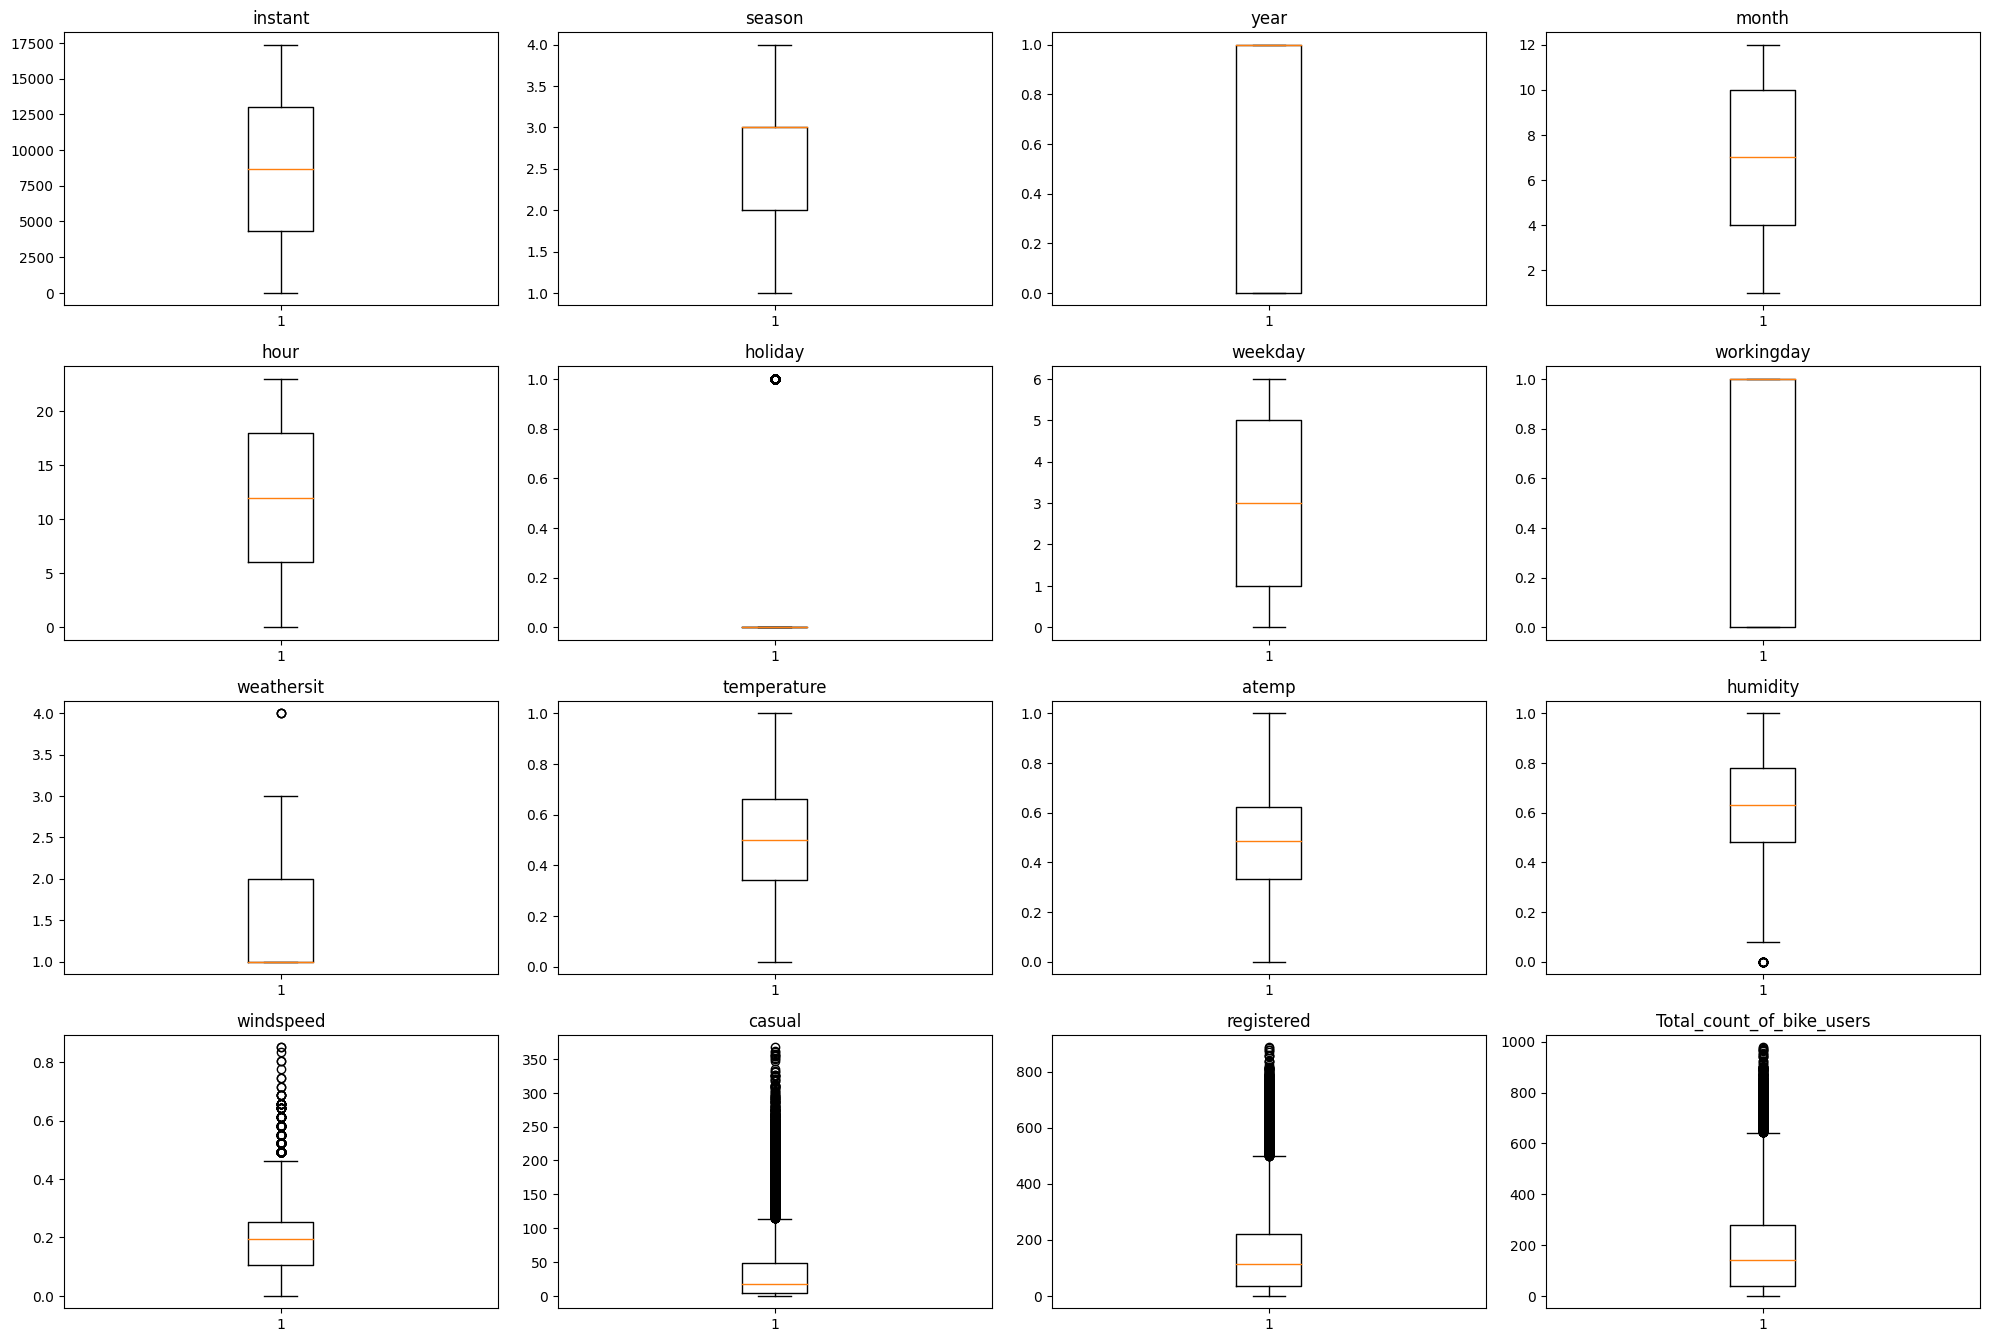

In [ ]:
#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered',
       'Total_count_of_bike_users'],
      dtype='object')

In [ ]:
df.instant.unique()

array([    1,     2,     3, ..., 17377, 17378, 17379])

In [ ]:
df.instant.nunique()

17379

In [ ]:
#del = df.(columns=['Policy_Number'])
del df['instant']
df

,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,Total_count_of_bike_users
0,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
#del = df.(columns=['Policy_Number'])
del df['casual']
df

,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,registered,Total_count_of_bike_users
0,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,108,119
17375,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,81,89
17376,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,83,90
17377,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,48,61


In [ ]:
#del = df.(columns=['Policy_Number'])
del df['dteday']
df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,registered,Total_count_of_bike_users
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,48,61


In [ ]:
df.season.unique()

array([1, 2, 3, 4])

In [ ]:
df.season.nunique()

4

In [ ]:
# Check the skewness of working_hours_per_week
df["season"].skew()

-0.005415699379117384

<Axes: xlabel='season', ylabel='Density'>

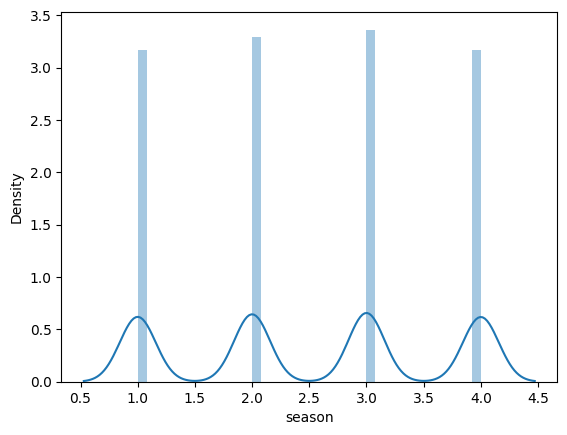

In [ ]:
# Plot the histogram of fnlwgt_sqr variable to check the distribution of fnlwgt_sqr
sns.distplot(df["season"])

In [ ]:
df.year.unique()

array([0, 1])

In [ ]:
df.year.nunique()

2

In [ ]:
# Check the skewness of working_hours_per_week
df["year"].skew()

-0.010243264826335554

In [ ]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
df.month.nunique()

12

Text(0, 0.5, 'month')

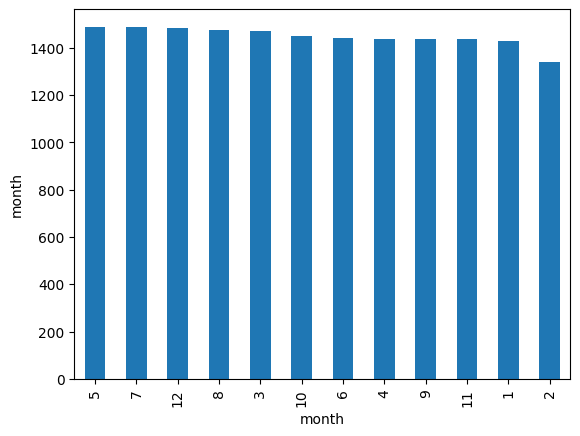

In [ ]:
df['month'].value_counts().plot(kind='bar')
plt.xlabel('month')
plt.ylabel('month')

In [ ]:
# Check the skewness of education_no_of_years_log
df["month"].skew()

-0.009253248382682946

In [ ]:
df.holiday.unique()

array([0, 1])

In [ ]:
df.holiday.nunique()

2

Text(0, 0.5, 'holiday')

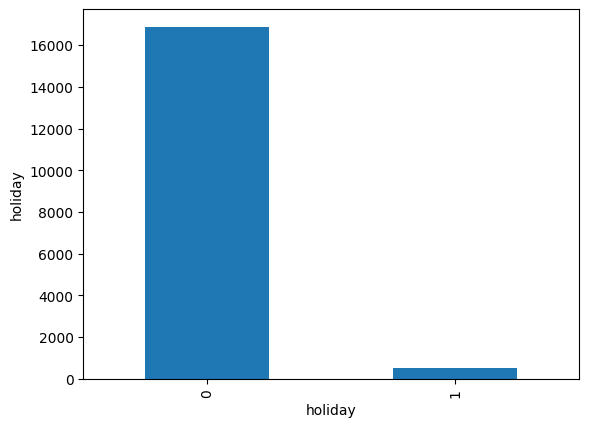

In [ ]:
df['holiday'].value_counts().plot(kind='bar')
plt.xlabel('holiday')
plt.ylabel('holiday')

In [ ]:
df['holiday'] = df['holiday'].replace({0: 1, 1: 0})

Text(0, 0.5, 'holiday')

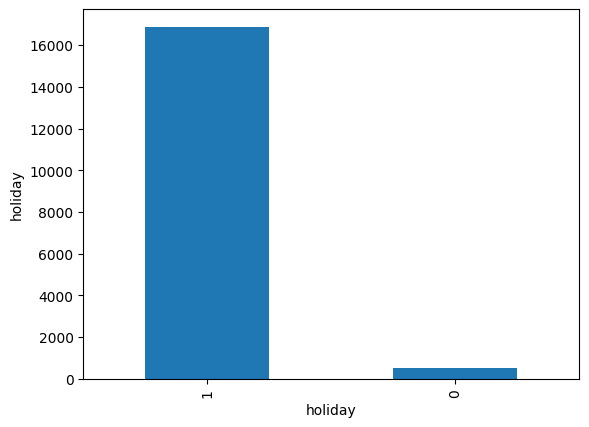

In [ ]:
df['holiday'].value_counts().plot(kind='bar')
plt.xlabel('holiday')
plt.ylabel('holiday')

In [ ]:
# Check the skewness of education_no_of_years_log
df["holiday"].skew()

-5.638537992884008

In [ ]:
df.workingday.unique()

array([0, 1])

In [ ]:
df.workingday.nunique()

2

Text(0, 0.5, 'workingday')

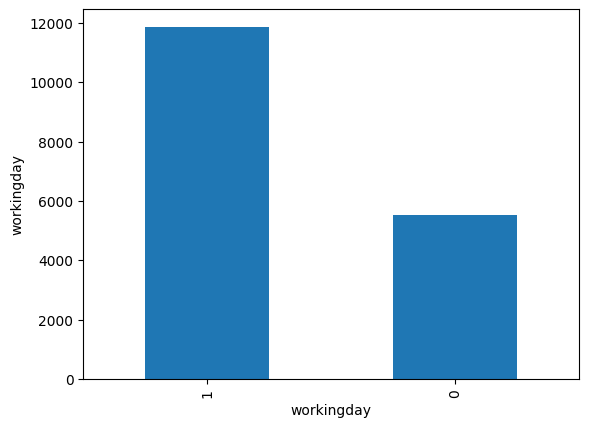

In [ ]:
df['workingday'].value_counts().plot(kind='bar')
plt.xlabel('workingday')
plt.ylabel('workingday')

In [ ]:
df.weathersit.unique()

array([1, 2, 3, 4])

In [ ]:

df.weathersit.nunique()

4

Text(0, 0.5, 'weathersit')

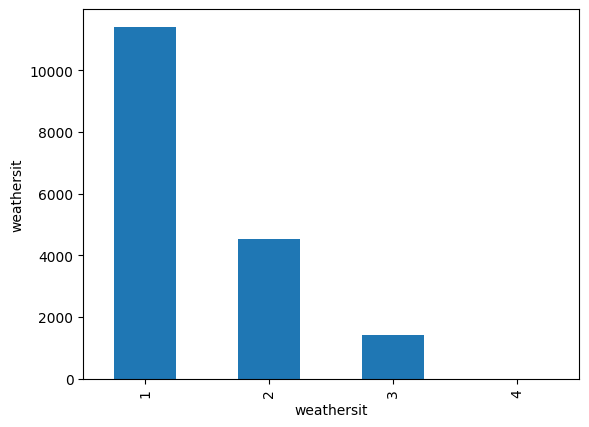

In [ ]:

df['weathersit'].value_counts().plot(kind='bar')
plt.xlabel('weathersit')
plt.ylabel('weathersit')

In [ ]:
df.temperature.unique()

array([0.24, 0.22, 0.2 , 0.32, 0.38, 0.36, 0.42, 0.46, 0.44, 0.4 , 0.34,
       0.3 , 0.26, 0.16, 0.14, 0.18, 0.12, 0.28, 0.1 , 0.08, 0.06, 0.04,
       0.02, 0.52, 0.56, 0.58, 0.6 , 0.48, 0.54, 0.5 , 0.66, 0.64, 0.62,
       0.68, 0.7 , 0.74, 0.76, 0.72, 0.78, 0.82, 0.8 , 0.86, 0.88, 0.9 ,
       0.84, 0.92, 0.94, 0.96, 0.98, 1.  ])

In [ ]:
df.temperature.nunique()

50

In [ ]:
# #  Remove the skewness and make a new column called working_hours_per_week_log to store the log of working_hours_per_week
# df["temperature"]=np.log1p(df["temperature"])

<Axes: xlabel='temperature', ylabel='Density'>

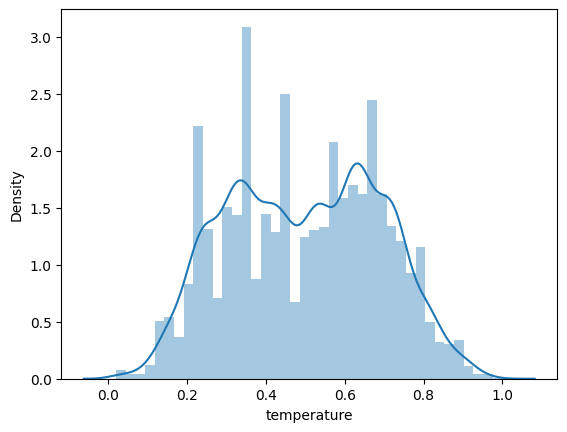

In [ ]:
#  Plot the histogram of working_hours_per_week_log variable to check the distribution of working_hours_per_week_log
sns.distplot(df["temperature"])

In [ ]:
# Check the skewness of working_hours_per_week
df["temperature"].skew()

-0.00602088334827027

In [ ]:
df.humidity.unique()

array([0.81, 0.8 , 0.75, 0.86, 0.76, 0.77, 0.72, 0.82, 0.88, 0.87, 0.94,
       1.  , 0.71, 0.66, 0.57, 0.46, 0.42, 0.39, 0.44, 0.47, 0.5 , 0.43,
       0.4 , 0.35, 0.3 , 0.32, 0.64, 0.69, 0.55, 0.59, 0.63, 0.68, 0.74,
       0.51, 0.56, 0.52, 0.49, 0.48, 0.37, 0.33, 0.28, 0.38, 0.36, 0.93,
       0.29, 0.53, 0.34, 0.54, 0.41, 0.45, 0.92, 0.62, 0.58, 0.61, 0.6 ,
       0.65, 0.7 , 0.27, 0.21, 0.25, 0.26, 0.31, 0.73, 0.24, 0.23, 0.22,
       0.19, 0.15, 0.67, 0.1 , 0.08, 0.12, 0.14, 0.13, 0.17, 0.16, 0.18,
       0.96, 0.2 , 0.85, 0.  , 0.9 , 0.83, 0.78, 0.84, 0.89, 0.79, 0.97,
       0.91])

In [ ]:
df.humidity.nunique()

89

In [ ]:
# Check the skewness of working_hours_per_week
df["humidity"].skew()

-0.11128714936537845

In [ ]:
# # Assuming 'column_name' is the column you want to perform log1p on
# df['humidity'] = np.log1p(df['humidity'])

<Axes: xlabel='humidity', ylabel='Density'>

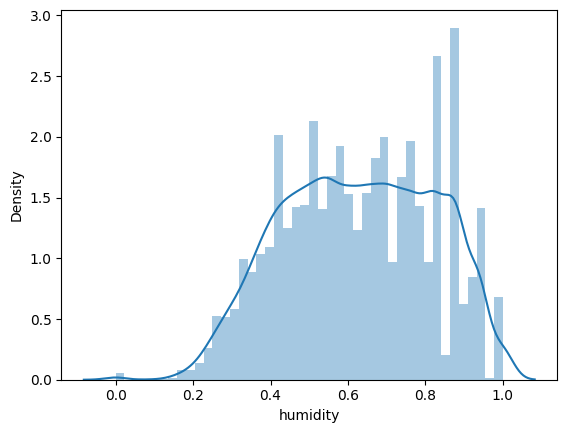

In [ ]:
#  Plot the histogram of working_hours_per_week_log variable to check the distribution of working_hours_per_week_log
sns.distplot(df["humidity"])

In [ ]:
# Check the skewness of working_hours_per_week
df["humidity"].skew()

-0.11128714936537845

In [ ]:
df.atemp.unique()

array([0.2879, 0.2727, 0.2576, 0.3485, 0.3939, 0.3333, 0.4242, 0.4545,
       0.4394, 0.4091, 0.2273, 0.2121, 0.197 , 0.1667, 0.1364, 0.1061,
       0.1212, 0.1818, 0.2424, 0.1515, 0.3182, 0.0606, 0.0758, 0.0909,
       0.303 , 0.0303, 0.0455, 0.    , 0.0152, 0.3636, 0.5   , 0.5303,
       0.5455, 0.5909, 0.4697, 0.5152, 0.6212, 0.6061, 0.4848, 0.3788,
       0.6364, 0.6515, 0.6667, 0.5758, 0.5606, 0.6818, 0.697 , 0.7424,
       0.7727, 0.7576, 0.7273, 0.7121, 0.803 , 0.7879, 0.8333, 0.8182,
       0.8485, 0.8788, 0.8636, 0.8939, 0.9242, 0.9091, 0.9545, 0.9848,
       1.    ])

In [ ]:
df.atemp.nunique()

65

In [ ]:
# Check the skewness of working_hours_per_week
df["atemp"].skew()

-0.09042885855903955

In [ ]:
# # Assuming 'column_name' is the column you want to perform log1p on
# df['humidity'] = np.log1p(df['humidity'])

<Axes: xlabel='humidity', ylabel='Density'>

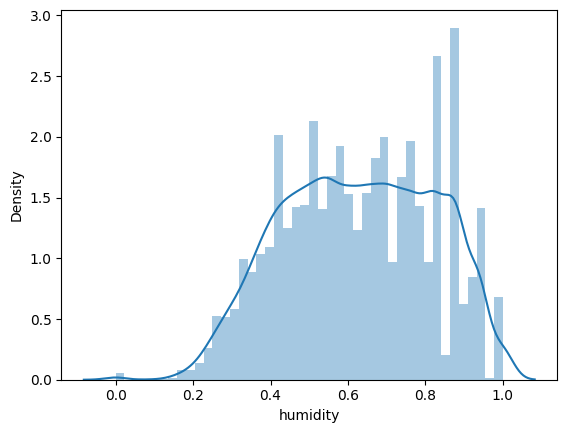

In [ ]:
#  Plot the histogram of working_hours_per_week_log variable to check the distribution of working_hours_per_week_log
sns.distplot(df["humidity"])

In [ ]:
# Check the skewness of working_hours_per_week
df["atemp"].skew()

-0.09042885855903955

In [ ]:
df.windspeed.unique()

array([0.    , 0.0896, 0.2537, 0.2836, 0.2985, 0.194 , 0.2239, 0.1343,
       0.1642, 0.3284, 0.4478, 0.3582, 0.4179, 0.3881, 0.1045, 0.4925,
       0.5522, 0.4627, 0.5224, 0.5821, 0.6567, 0.6119, 0.7761, 0.6866,
       0.7463, 0.6418, 0.806 , 0.8507, 0.8358, 0.7164])

In [ ]:
df.windspeed.nunique()

30

In [ ]:
# Check the skewness of working_hours_per_week
df["windspeed"].skew()

0.5749052034923136

In [ ]:
# Assuming 'column_name' is the column you want to perform log1p on
df['windspeed'] = np.log1p(df['windspeed'])

<Axes: xlabel='windspeed', ylabel='Density'>

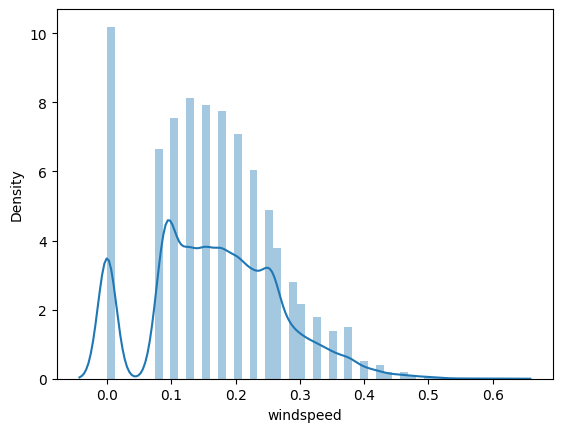

In [ ]:
#  Plot the histogram of working_hours_per_week_log variable to check the distribution of working_hours_per_week_log
sns.distplot(df["windspeed"])

In [ ]:
# Check the skewness of working_hours_per_week
df["windspeed"].skew()

0.26392591843816077

In [ ]:
df.registered.unique()

array([ 13,  32,  27,  10,   1,   0,   2,   7,   6,  24,  30,  55,  47,
        71,  70,  52,  26,  31,  25,  17,  16,   8,   4,  19,  46,  54,
        73,  64,  67,  58,  43,  29,  20,   9,   5,   3,  63, 153,  81,
        33,  41,  48,  53,  66, 146, 148, 102,  49,  11,  36,  92, 177,
        98,  37,  50,  79,  68, 202, 179, 110,  34,  87, 192, 109,  74,
        65,  85, 186, 166, 127,  82,  40,  18,  95, 216, 116,  42,  57,
        78,  59, 163, 158,  51,  76, 190, 125, 178,  39,  14,  15,  56,
        60,  90,  83,  69,  28,  35,  22,  12,  77,  44,  38,  75, 184,
       174, 154,  97, 214,  45,  72, 130,  94, 139, 135, 197, 137, 141,
       156, 117, 155, 134,  89,  80, 108,  61, 124, 132, 196, 107, 100,
       247, 140,  86,  62, 207, 210, 159, 151, 119,  93,  23, 171, 145,
       101,  21, 103, 233, 208, 218, 133, 147,  84,  88, 104, 182, 112,
       114, 172, 165, 105, 183, 175, 170, 217,  91, 195, 152, 126, 115,
       223, 123, 236, 128, 198, 157, 168,  99, 173, 121, 212, 11

In [ ]:
df.registered.nunique()

776

In [ ]:
# Check the skewness of working_hours_per_week
df["registered"].skew()

1.5579042256481028

In [ ]:
# Assuming 'column_name' is the column you want to perform log1p on
df['registered'] = np.log1p(df['registered'])

<Axes: xlabel='registered', ylabel='Density'>

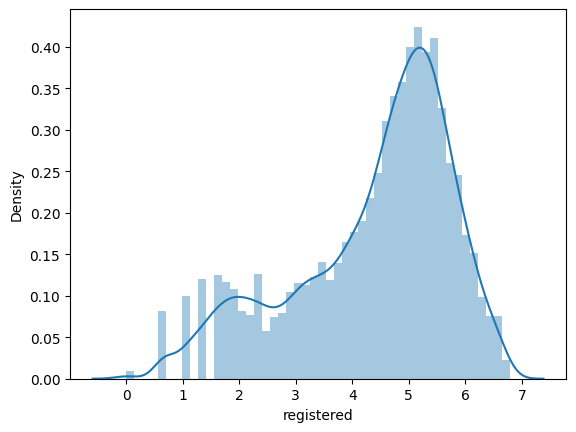

In [ ]:
#  Plot the histogram of working_hours_per_week_log variable to check the distribution of working_hours_per_week_log
sns.distplot(df["registered"])

In [ ]:
# Check the skewness of working_hours_per_week
df["registered"].skew()

-0.8196438280984477

In [ ]:
#del = df.(columns=['Policy_Number'])
del df['registered']
df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,Total_count_of_bike_users
0,1,0,1,0,1,6,0,1,0.24,0.2879,0.81,0.000000,16
1,1,0,1,1,1,6,0,1,0.22,0.2727,0.80,0.000000,40
2,1,0,1,2,1,6,0,1,0.22,0.2727,0.80,0.000000,32
3,1,0,1,3,1,6,0,1,0.24,0.2879,0.75,0.000000,13
4,1,0,1,4,1,6,0,1,0.24,0.2879,0.75,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,1,1,1,2,0.26,0.2576,0.60,0.152034,119
17375,1,1,12,20,1,1,1,2,0.26,0.2576,0.60,0.152034,89
17376,1,1,12,21,1,1,1,1,0.26,0.2576,0.60,0.152034,90
17377,1,1,12,22,1,1,1,1,0.26,0.2727,0.56,0.126016,61


In [ ]:
df.Total_count_of_bike_users.unique()

array([ 16,  40,  32,  13,   1,   2,   3,   8,  14,  36,  56,  84,  94,
       106, 110,  93,  67,  35,  37,  34,  28,  39,  17,   9,   6,  20,
        53,  70,  75,  59,  74,  76,  65,  30,  22,  31,   5,  64, 154,
        88,  44,  51,  61,  77,  72, 157,  52,  12,   4, 179, 100,  42,
        57,  78,  97,  63,  83, 212, 182, 112,  54,  48,  11,  33, 195,
       115,  46,  79,  71,  62,  89, 190, 169, 132,  43,  19,  95, 219,
       122,  45,  86, 172, 163,  69,  23,   7, 210, 134,  73,  50,  87,
       187, 123,  15,  25,  98, 102,  55,  10,  49,  82,  92,  41,  38,
       188,  47, 178, 155,  24,  18,  27,  99, 217, 130, 136,  29, 128,
        81,  68, 139, 137, 202,  60, 162, 144, 158, 117,  90, 159, 101,
       118, 129,  26, 104,  91, 113, 105,  21,  80, 125, 133, 197, 109,
       161, 249, 143, 215, 185, 152, 126, 166, 120,  96, 103,  58, 116,
       177, 184, 153, 108, 238, 222, 225, 146, 119, 149, 107, 156, 111,
       135, 176, 168, 175, 147, 220, 127, 205, 174, 121, 230,  6

In [ ]:
df.Total_count_of_bike_users.nunique()

869

In [ ]:
# Check the skewness of working_hours_per_week
df["Total_count_of_bike_users"].skew()

1.2774116037490577

In [ ]:
# Assuming 'column_name' is the column you want to perform log1p on
df['Total_count_of_bike_users'] = np.log1p(df['Total_count_of_bike_users'])

<Axes: xlabel='Total_count_of_bike_users', ylabel='Density'>

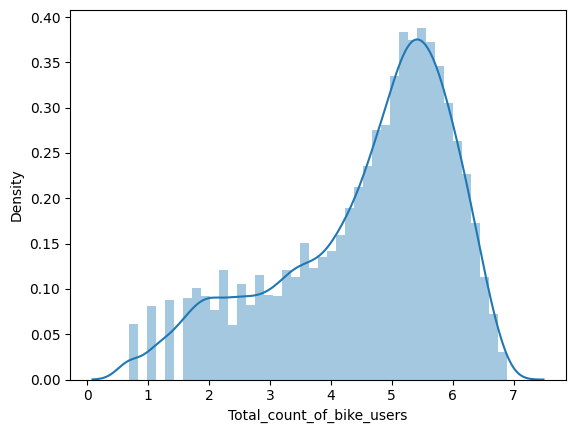

In [ ]:
#  Plot the histogram of working_hours_per_week_log variable to check the distribution of working_hours_per_week_log
sns.distplot(df["Total_count_of_bike_users"])

In [ ]:
# Check the skewness of working_hours_per_week
df["Total_count_of_bike_users"].skew()

-0.8181803744437346

Correlation

In [ ]:
correlation = df.corr()
correlation

,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,Total_count_of_bike_users
season,1.000000,-0.010742,0.830386,-0.006117,0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.147752,0.167198
year,-0.010742,1.000000,-0.010473,-0.003867,-0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008167,0.168902
month,0.830386,-0.010473,1.000000,-0.005772,-0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135024,0.114360
hour,-0.006117,-0.003867,-0.005772,1.000000,-0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.138495,0.564470
holiday,0.009585,-0.006692,-0.018430,-0.000479,1.000000,0.102088,0.252471,0.017036,0.027340,0.030973,0.010588,-0.003429,0.026007
weekday,-0.002335,-0.004485,0.010400,-0.003498,0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011026,0.029496
workingday,0.013743,-0.002196,-0.003477,0.002285,0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011892,0.004339
weathersit,-0.014524,-0.019157,0.005400,-0.020203,0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.027121,-0.121874
temperature,0.312025,0.040913,0.201691,0.137603,0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.018471,0.388694
atemp,0.319380,0.039222,0.208096,0.133750,0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.057971,0.385523


<Axes: >

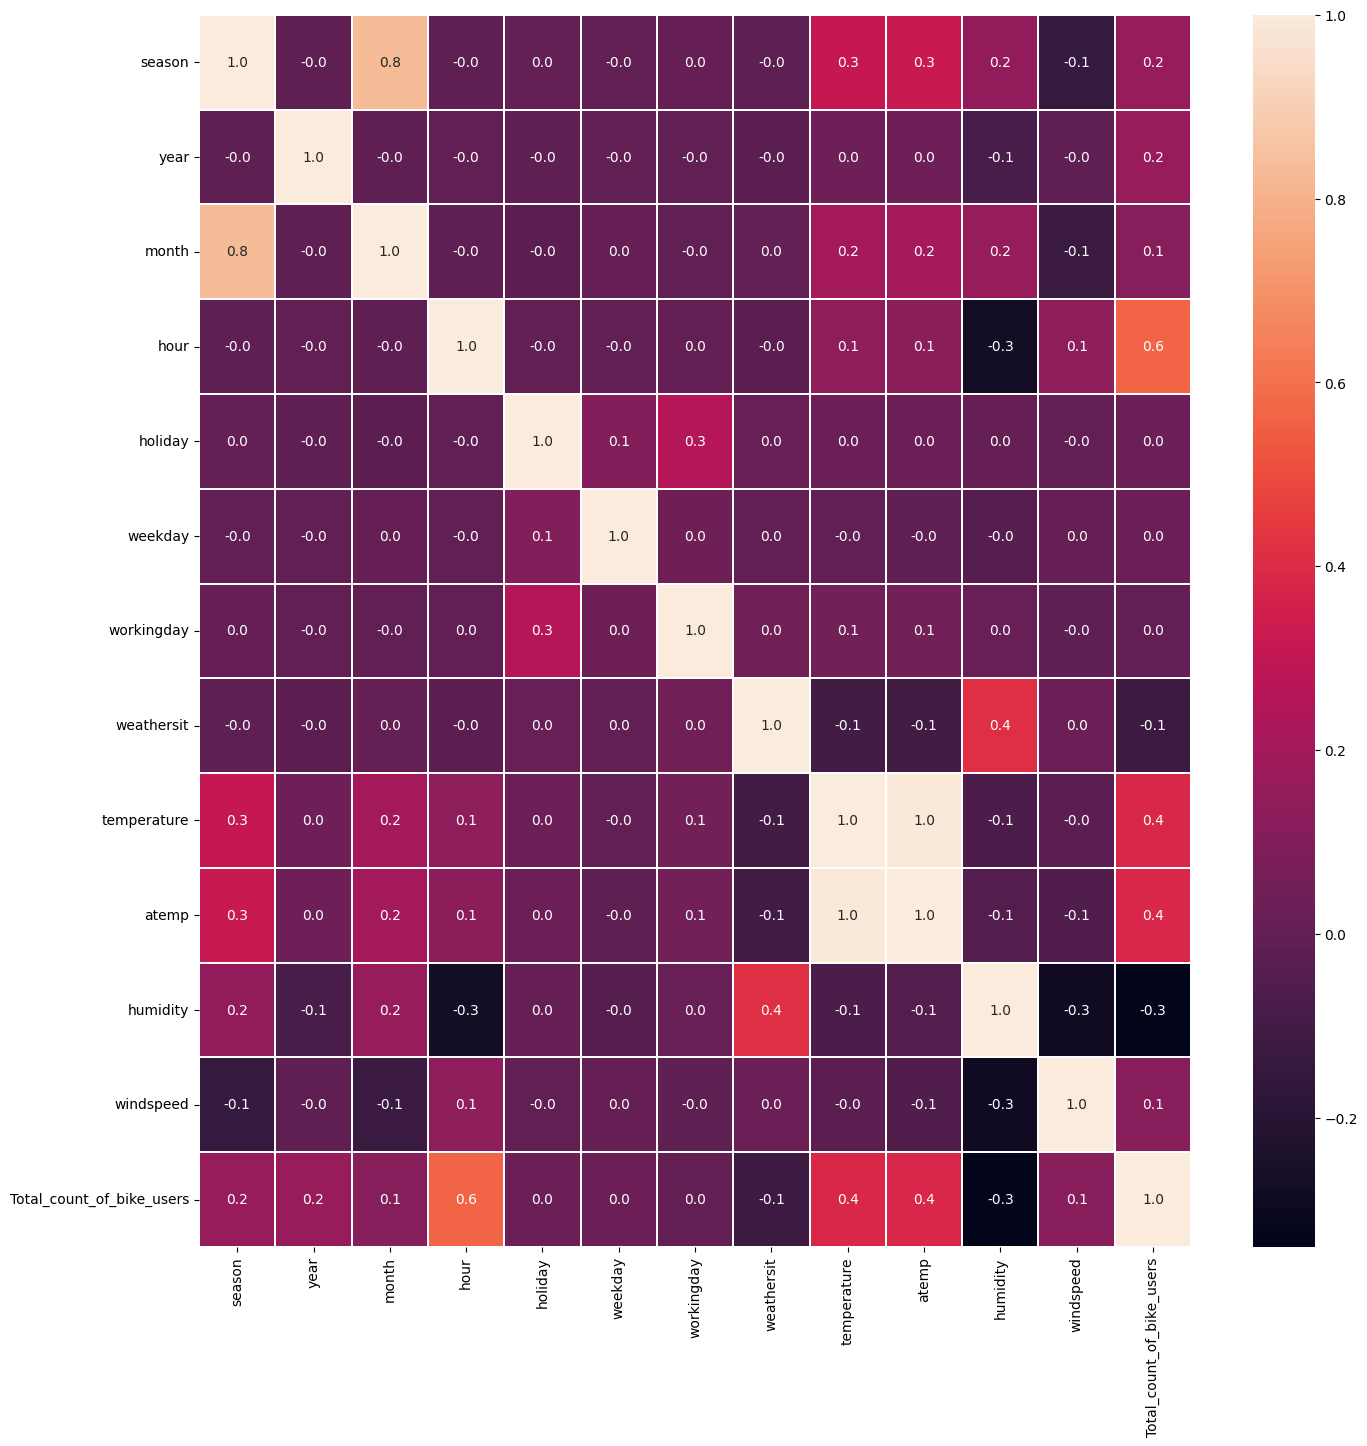

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '1.0001f',ax=ax)

In [ ]:
#  depandent variable and indepandent variable
x= df.drop(['Total_count_of_bike_users'],axis=1)
y= df['Total_count_of_bike_users']

In [ ]:
x

,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed
0,1,0,1,0,1,6,0,1,0.24,0.2879,0.81,0.000000
1,1,0,1,1,1,6,0,1,0.22,0.2727,0.80,0.000000
2,1,0,1,2,1,6,0,1,0.22,0.2727,0.80,0.000000
3,1,0,1,3,1,6,0,1,0.24,0.2879,0.75,0.000000
4,1,0,1,4,1,6,0,1,0.24,0.2879,0.75,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,1,1,1,2,0.26,0.2576,0.60,0.152034
17375,1,1,12,20,1,1,1,2,0.26,0.2576,0.60,0.152034
17376,1,1,12,21,1,1,1,1,0.26,0.2576,0.60,0.152034
17377,1,1,12,22,1,1,1,1,0.26,0.2727,0.56,0.126016


In [ ]:
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
17374    4.787492
17375    4.499810
17376    4.510860
17377    4.127134
17378    3.912023
Name: Total_count_of_bike_users, Length: 17379, dtype: float64

In [ ]:
print(x.shape)
print(y.shape)

(17379, 12)
(17379,)


In [ ]:
 # This code utilizes the train_test_split function from Scikit-Learn to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
# This snippet is utilizing the LinearRegression model from Scikit-Learn to perform linear regression.
# Fitting linear model
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept of linear equation:",linearregression.intercept_)
print("\nCoefficient of the equation are :",linearregression.coef_)

Intercept of linear equation: 2.4056645109555688

Coefficient of the equation are : [ 1.76198261e-01  4.17119691e-01 -6.45401598e-03  9.79907899e-02
  1.67139713e-01  2.08015539e-02 -5.39967514e-02  1.23455753e-03
  3.17852491e-01  1.86384753e+00 -1.40682244e+00  4.35753206e-01]


Model performances

In [ ]:
print("Intercept of linear equation:",linearregression.intercept_)
print("\nCoefficient of the equation are :",linearregression.coef_)

In [ ]:
# predicting  using  the indepandent variables
def adj_r2_score(predictors, targets, predictions):
    r2  = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 -((1 -r2)*(n - 1)/ (n - k - 1))

#Function to computer  MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

#Functions to compute different metrics to check performance of regression model
def model_performance_regression(model,predictors,target):

    """"
    Functions to compute different metrics to check performance of regression model performance
    model : regressor
    predictors : indepandent variables
    target : depandent variables

    """
    pred = model.predict(predictors)

    r2 = r2_score(target , pred) # To compuct r2
    adjr2 = adj_r2_score(predictors, target,pred) # To compuct adjustant r2
    rmse = np.sqrt(mean_squared_error(target,pred)) # To compuct rmse
    mae = mean_absolute_error(target,pred) # To compuct mae
    mape = mape_score(target,pred) # To compuct mape

    # creating a dataframe of matrics
    df_perf = pd.DataFrame(
    {
        "RMSE" : rmse,
        "MAE" : mae,
        "R-squared" : r2,
        "Adj.R-squared" : adjr2,
        "MAPE": mape,
    },
      index=[0],
    )
    return df_perf

In [ ]:
print("Train Performance\n")
sklearn_train_perf = model_performance_regression(linearregression, x_train,y_train)
sklearn_train_perf

Train Performance



,RMSE,MAE,R-squared,Adj.R-squared,MAPE
0,1.015914,0.804443,0.488448,0.487943,26.317181


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olmodel_test_perf = model_performance_regression(linearregression, x_test,y_test)
olmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj.R-squared,MAPE
0,1.018749,0.807657,0.479145,0.477943,26.099746


In [ ]:
import statsmodels.api as sm

In [ ]:
# Lets us bulid linear regression model using statsmodel
x = sm.add_constant(x)
x_train1, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

olmode0 = sm.OLS(y_train, x_train1)
olsres0 = olmode0.fit()
print(olsres0.summary())

                                OLS Regression Results                               
Dep. Variable:     Total_count_of_bike_users   R-squared:                       0.486
Model:                                   OLS   Adj. R-squared:                  0.486
Method:                        Least Squares   F-statistic:                     958.8
Date:                       Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                               07:38:11   Log-Likelihood:                -17455.
No. Observations:                      12165   AIC:                         3.494e+04
Df Residuals:                          12152   BIC:                         3.503e+04
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Test of Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x.values,i)for i in range(x.shape[1])],index = x. columns)
print('Series before feature selaction: /n/n{}/n'.format(vif_series1))

Series before feature selaction: /n/nconst          71.936180
season          3.499714
year            1.011529
month           3.285198
hour            1.123184
holiday         1.081573
weekday         1.015777
workingday      1.073753
weathersit      1.280531
temperature    43.787905
atemp          44.001415
humidity        1.522534
windspeed       1.196968
dtype: float64/n


Removing Multicollinearity

In [ ]:
# WE drop the one with hights vif values and check the multicolinearity again
x_train2 = x_train1.drop('atemp',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train2.values,i)for i in range(x_train2.shape[1])],index = x_train2.columns)
print('Series before feature selaction: /n/n{}/n'.format(vif_series2))
#Then drop vehical age category old should be below 5

Series before feature selaction: /n/nconst          70.923125
season          3.442920
year            1.012311
month           3.232220
hour            1.121416
holiday         1.077253
weekday         1.013258
workingday      1.070859
weathersit      1.276988
temperature     1.164491
humidity        1.523067
windspeed       1.138378
dtype: float64/n


Observation

Since all the VIF values are below 5. Lets us now try check for the R2 and Adjusted R2

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                                OLS Regression Results                               
Dep. Variable:     Total_count_of_bike_users   R-squared:                       0.485
Model:                                   OLS   Adj. R-squared:                  0.484
Method:                        Least Squares   F-statistic:                     1039.
Date:                       Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                               07:38:11   Log-Likelihood:                -17473.
No. Observations:                      12165   AIC:                         3.497e+04
Df Residuals:                          12153   BIC:                         3.506e+04
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
x_train3 = x_train2.drop(['weathersit'], axis=1)

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                                OLS Regression Results                               
Dep. Variable:     Total_count_of_bike_users   R-squared:                       0.485
Model:                                   OLS   Adj. R-squared:                  0.484
Method:                        Least Squares   F-statistic:                     1143.
Date:                       Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                               07:38:11   Log-Likelihood:                -17473.
No. Observations:                      12165   AIC:                         3.497e+04
Df Residuals:                          12154   BIC:                         3.505e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
x_train4 = x_train3.drop(['month'], axis=1)

In [ ]:
olsmod3 = sm.OLS(y_train, x_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                                OLS Regression Results                               
Dep. Variable:     Total_count_of_bike_users   R-squared:                       0.485
Model:                                   OLS   Adj. R-squared:                  0.484
Method:                        Least Squares   F-statistic:                     1271.
Date:                       Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                               07:38:11   Log-Likelihood:                -17474.
No. Observations:                      12165   AIC:                         3.497e+04
Df Residuals:                          12155   BIC:                         3.504e+04
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Checking the Linear Regression Assumptions

Linearity of variables

Normality of error terms

Homoscedasticity

Independence of errors from predictor variables


Mean of residual should be zero

In [ ]:
residual= olsres3.resid
np.mean(residual)

5.554090320051618e-14

In [ ]:
residual=olsres3.resid
fitted=olsres3.fittedvalues #predicted values

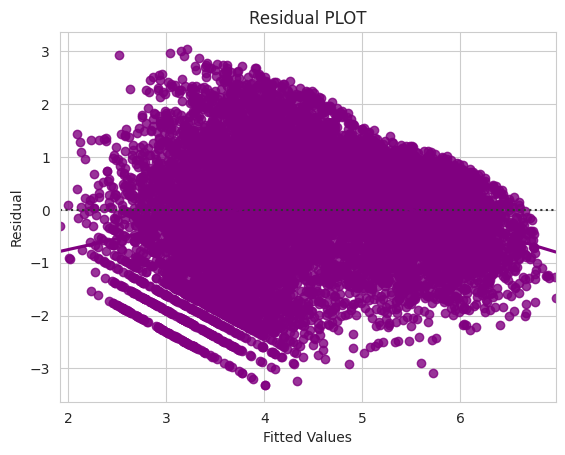

In [ ]:
sns.set_style("whitegrid")
sns.residplot(x=fitted,y=residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Test for Normality

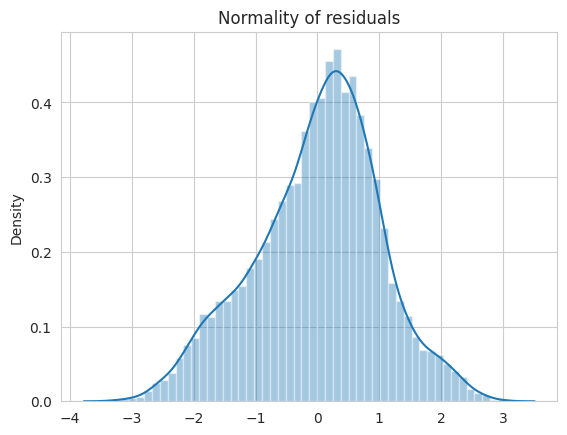

In [ ]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

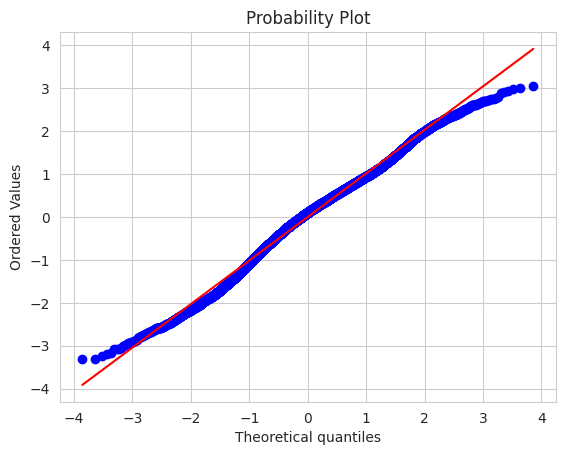

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [ ]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9915107488632202, pvalue=3.227899878731015e-26)

Test of Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train3)
lzip(name, test)

[('F statistic', 0.9929290913082909), ('p-value', 0.608898067440014)]

Predicting on the test data

In [ ]:
x_train4.columns

Index(['const', 'season', 'year', 'hour', 'holiday', 'weekday', 'workingday',
       'temperature', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
x_test_final = x_test[x_train4.columns]

In [ ]:
x_test_final.head()

,const,season,year,hour,holiday,weekday,workingday,temperature,humidity,windspeed
12830,1.0,3,1,19,1,6,0,0.80,0.27,0.177309
8688,1.0,1,1,20,0,1,0,0.24,0.41,0.202042
7091,1.0,4,0,2,1,5,1,0.32,0.66,0.249669
12230,1.0,2,1,19,1,2,1,0.78,0.52,0.306160
431,1.0,1,0,0,1,4,1,0.26,0.56,0.327936


In [ ]:
y_pred = olsres3.predict(x_test_final)


Checking the performance on train and test

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(olsres3, x_train4, y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj.R-squared,MAPE
0,1.01759,0.806307,0.484738,0.484314,26.173435


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsres3, x_test_final, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj.R-squared,MAPE
0,1.019383,0.807322,0.483273,0.482279,27.036808


Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Assuming X is your feature matrix and y is the target variable
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
# Fit the model on the training data
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test data
predictions = dt_regressor.predict(x_test)

In [ ]:
# Evaluate the model (for example, using Mean Squared Error)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2065019927659199


In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming X_train, X_test, y_train, y_test are your training and test sets
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# Make predictions on the test set
predictions = linear_reg.predict(x_test)

# Evaluate the model using metrics like Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# You can also use other regression metrics like R-squared, etc.
r_squared = linear_reg.score(x_test, y_test)
print("R-squared:", r_squared)


Mean Squared Error: 1.0271331831829085
R-squared: 0.4783007014663855


In [ ]:
model = DecisionTreeRegressor(random_state=1)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

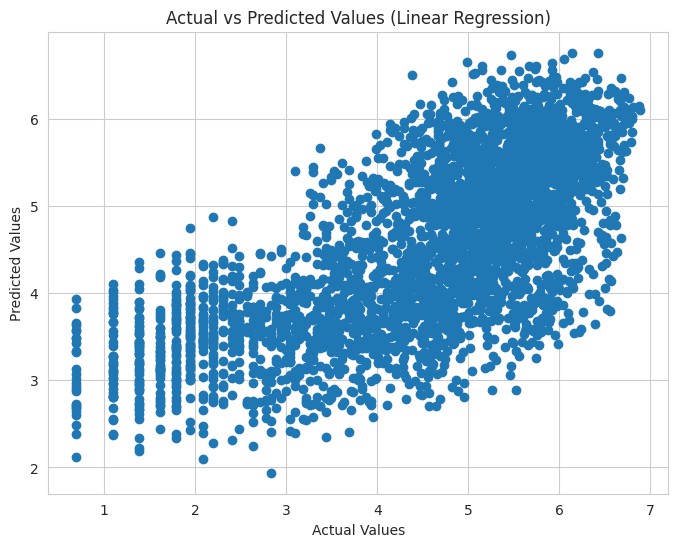

In [ ]:
# Assuming X_train, X_test, y_train, y_test are your training and test sets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# Make predictions on the test set
predictions = linear_reg.predict(x_test)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

In [ ]:
feature_names = x.columns  # Get the list of column names as feature names
#feature_names.remove('Discount_Offering')  # Remove the target column name if present

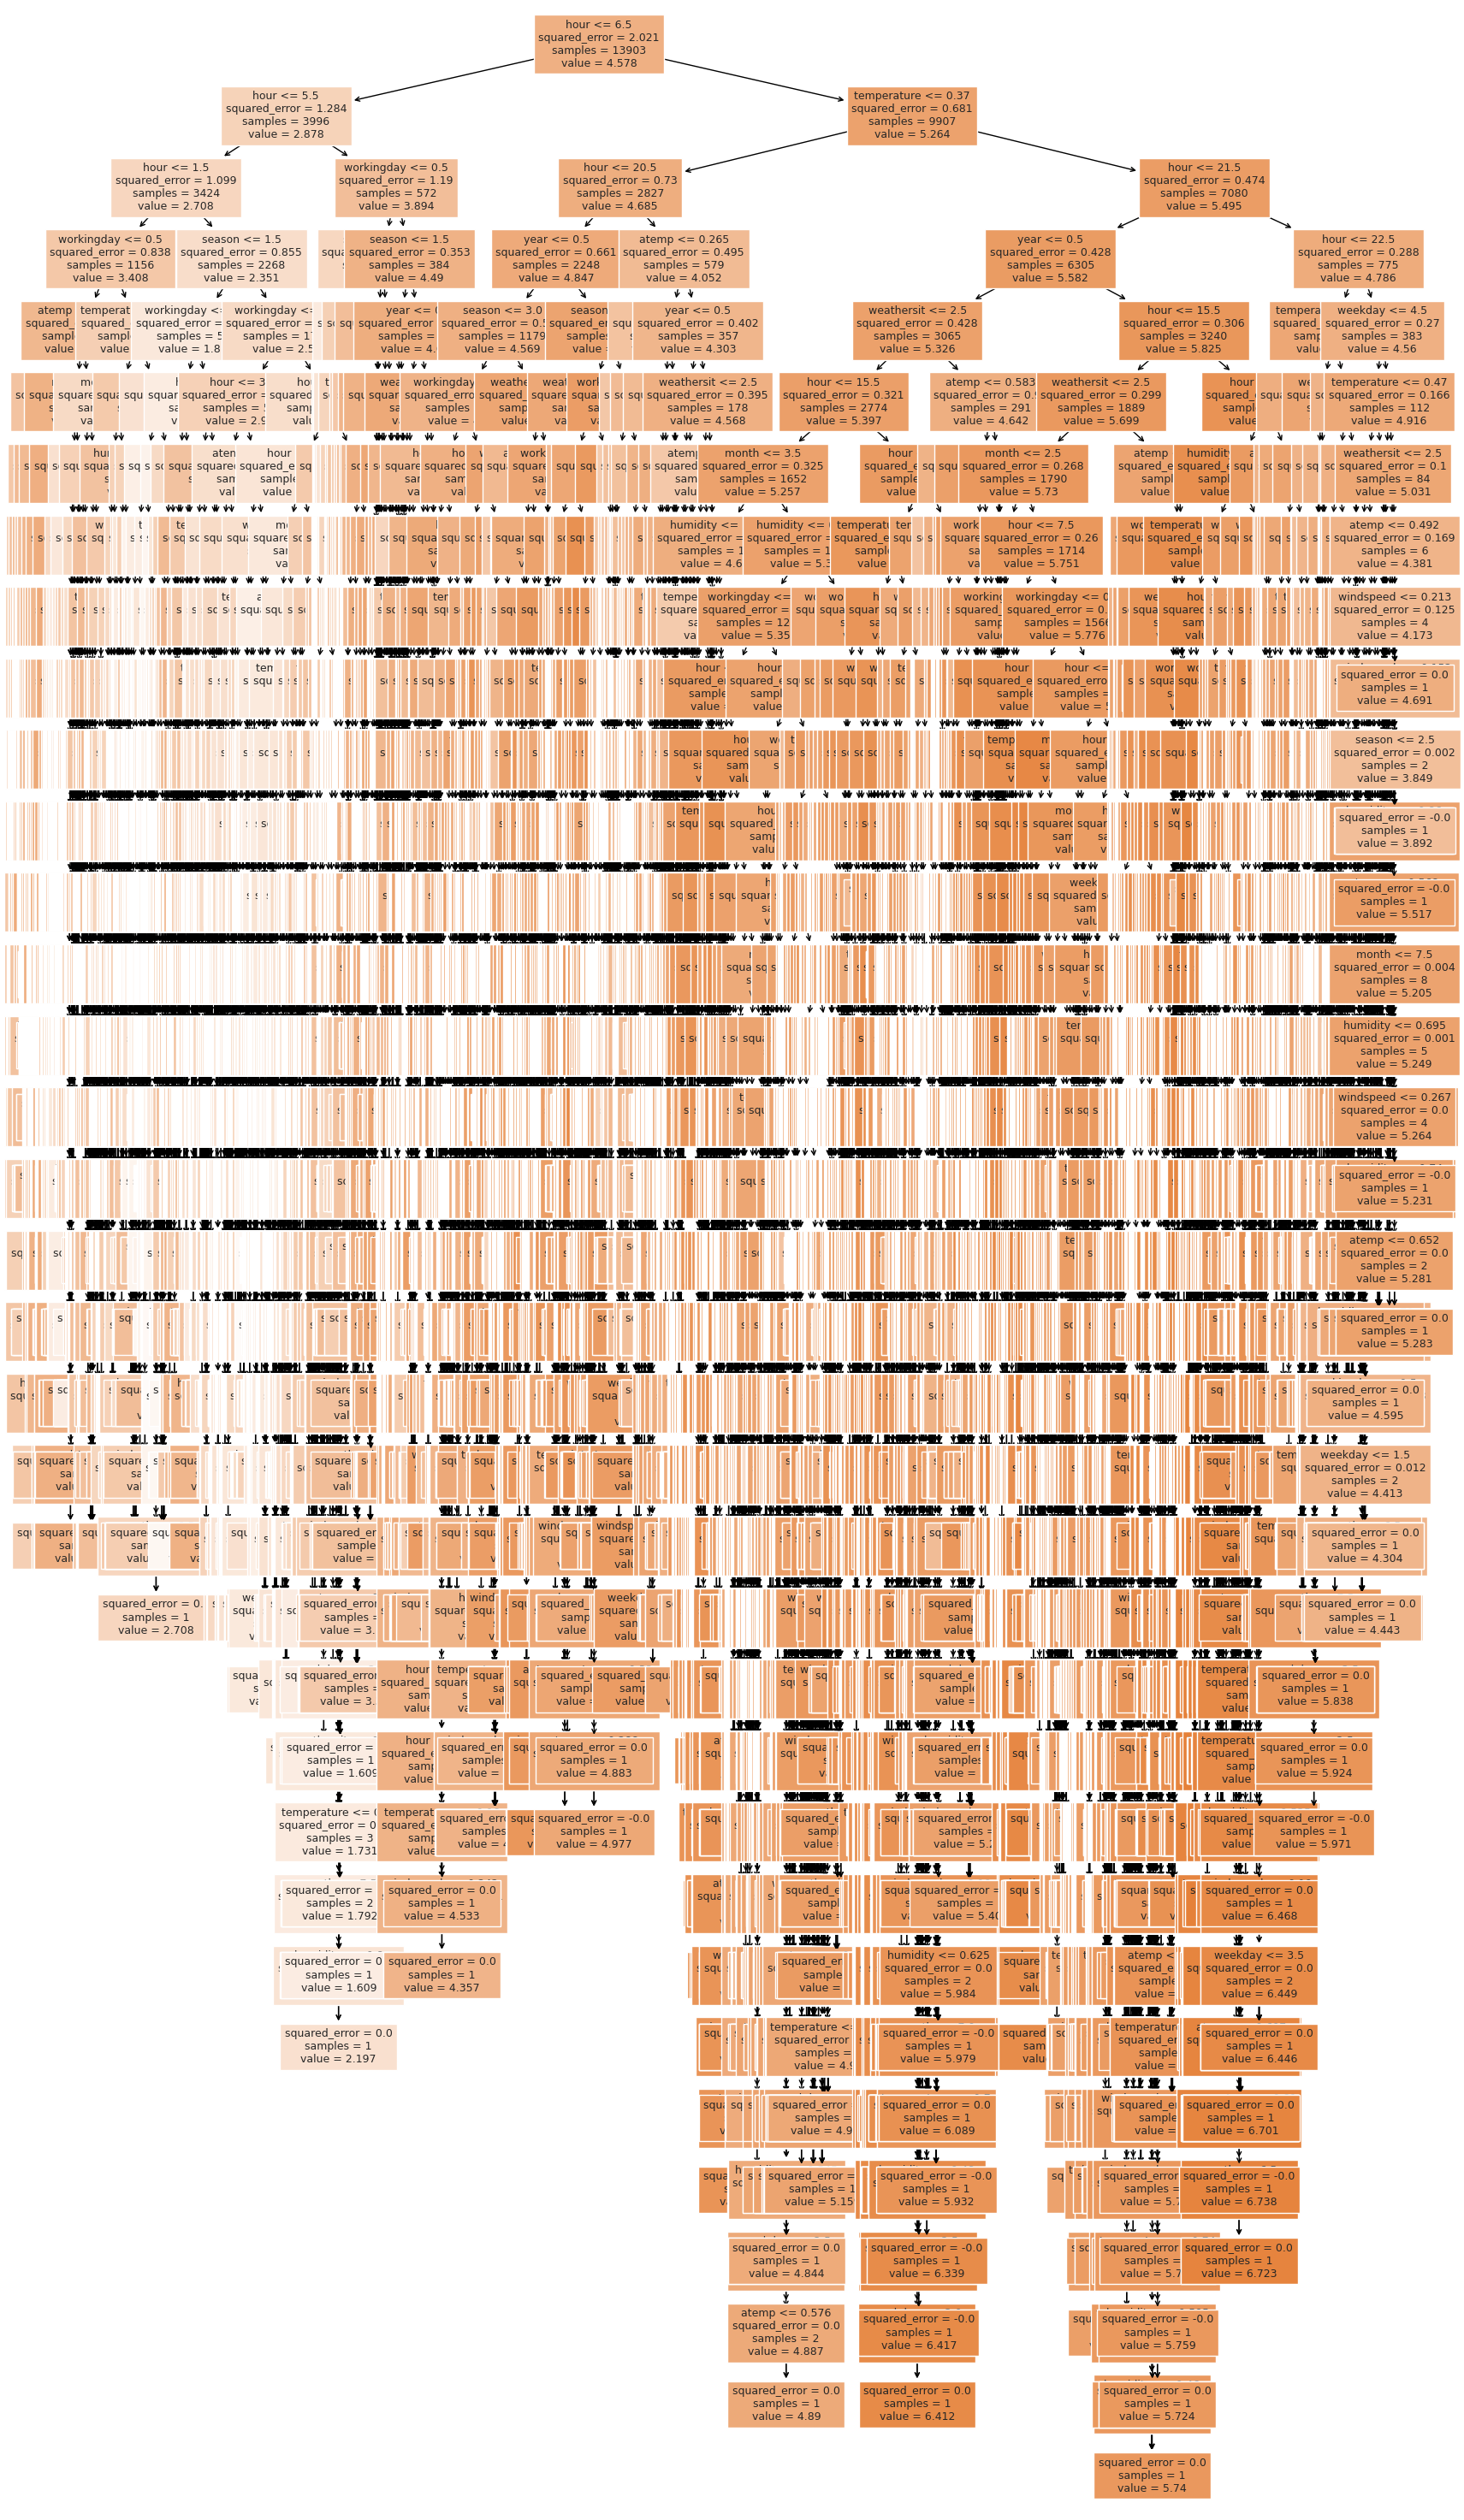

In [ ]:
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Create a Decision Tree Regressor
estimator = DecisionTreeRegressor(random_state=1)

# Define the grid of parameters to search through
parameters = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use R-squared as the metric for evaluation
scorer = metrics.make_scorer(metrics.r2_score)

# Perform Grid Search with cross-validation
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Get the best model from the Grid Search
best_estimator = grid_obj.best_estimator_

# Fit the best model to the training data
best_estimator.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_leaf=4,
                      min_samples_split=9, random_state=1)

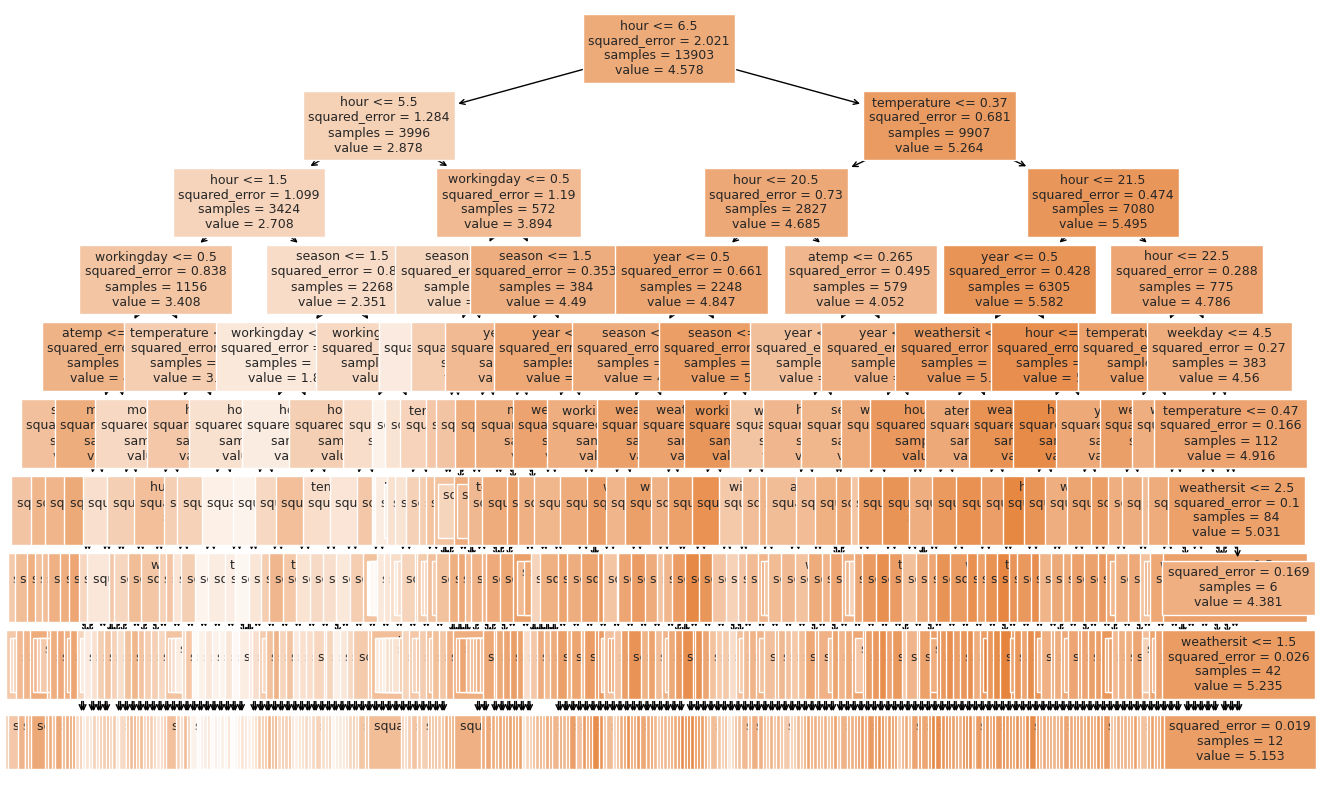

In [ ]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(best_estimator,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()